**In this part of the analysis we will mainly focus on-**

**I) Duration and distance travelled by the bikers.**

**II)Age and gender of the bikers.** 

**III) Correlation between duration distance and age.** 

**Like part-1, We will also explain what kind of visualization will be used for each part and what are the key observations that can be made from each visual.**

In [1]:
#importing libraries
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import transforms, pyplot as plt
%matplotlib inline

In [2]:
#calling the saved dataframe
%store -r df
%store -r df_time
%store -r df_customer
%store -r df_subscriber

In [3]:
#Colors that will be used throughout the analysis- taken from ref 5 accessed during Dec-2018
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [4]:
#Shape of the dataframe- gives the number of rows and columns
df.shape

(1651156, 26)

In [5]:
# Creates bin edges for duration of biking
bin_edges = [0,15, 30, 1437]

# Creates bin names based on the duration
bin_names = ['1-15 min','16-30 min','>30 min']

# Creates decade_levels column based on the duration of biking
df['dur_cat'] = pd.cut(df['duration_min'], bin_edges, labels = bin_names)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,year,str_month_no,start_hour,end_hour,duration_min,day_type,age,season,distance,dur_cat
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,...,2018,1,22,19,1254.733333,Weekday,32,Winter,2.488001,>30 min
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,...,2018,1,14,10,1192.933333,Weekday,22,Winter,2.972357,>30 min
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,...,2018,1,19,6,666.100000,Weekday,27,Winter,2.443038,>30 min
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,...,2018,1,23,0,7.550000,Weekday,30,Winter,1.340181,1-15 min
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,...,2018,1,23,23,3.000000,Weekday,38,Winter,0.631765,1-15 min



### 4. How long do the bikers bike?


**Visual**: In answering the question we will mostly use line plots and bar plots. Because line plots are the best when it comes to showing time series data to explain trend over a period. As for the bar charts, it is very useful about categorical data like duration category and can be interpreted easily. We will also use point plot to observe the change of biking duration during weekend and weekdays across the seasons.



**4-A. Average duration of journeys by the Subscribers and Customers Across the days of the week **

In [6]:
#biking duration per user type
df.groupby(['user_type']).duration_min.mean().reset_index(name='average_biking_duration')

,user_type,average_biking_duration
0,Customer,27.217398
1,Subscriber,11.175013


**10.Note: Customers in average bike for a much longer duration than the Subscribers.**

In [7]:
#first five rows of the dataframe
df_subscriber.head()

,user_type,member_gender,month,day,year,str_month_no,start_hour,end_hour,duration_min,day_type,age,season,distance,dur_cat
4,Subscriber,Female,Dec,Sun,2017,12,14,2,726.716667,Weekend,20,Winter,0.637772,31-1437 min
28,Subscriber,Male,Dec,Sun,2017,12,23,23,14.516667,Weekend,38,Winter,0.623898,1-15 min
32,Subscriber,Female,Dec,Sun,2017,12,23,23,12.216667,Weekend,37,Winter,0.623898,1-15 min
34,Subscriber,Male,Dec,Sun,2017,12,23,23,7.916667,Weekend,39,Winter,1.863666,1-15 min
35,Subscriber,Male,Dec,Sun,2017,12,23,23,2.533333,Weekend,37,Winter,0.344039,1-15 min


In [8]:
#average duration of biking for the subscribers in all the days of the week 
df_subscriber_duration = df_subscriber.groupby(['day'])['duration_min'].mean()
df_subscriber_duration 

day
Fri    10.891594
Mon    10.681419
Sat    12.245061
Sun    12.132267
Thu    10.856308
Tue    10.800765
Wed    10.721274
Name: duration_min, dtype: float64

In [9]:
# new index to rearrange the days- Monday as the first day and Sunday is the last day of the week
new_index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# reindexing as per new index
df_subscriber_duration = df_subscriber_duration.reindex(new_index)
df_subscriber_duration = df_subscriber_duration.reset_index(name='sub_avg_duration')
df_subscriber_duration

,day,sub_avg_duration
0,Mon,10.681419
1,Tue,10.800765
2,Wed,10.721274
3,Thu,10.856308
4,Fri,10.891594
5,Sat,12.245061
6,Sun,12.132267


In [10]:
#average duration of biking for the customers in all the days of the week 
df_customer_duration = df_customer.groupby(['day'],sort=False)['duration_min'].mean()
df_customer_duration 

day
Sun    30.834219
Sat    31.376311
Fri    25.747484
Thu    23.262761
Wed    25.218478
Tue    25.239387
Mon    27.241564
Name: duration_min, dtype: float64

In [11]:
#reinidexing the days
df_customer_duration = df_customer_duration.reindex(new_index)
df_customer_duration  = df_customer_duration.reset_index(name='cus_avg_duration')
#see the duration for the customer
df_customer_duration

,day,cus_avg_duration
0,Mon,27.241564
1,Tue,25.239387
2,Wed,25.218478
3,Thu,23.262761
4,Fri,25.747484
5,Sat,31.376311
6,Sun,30.834219


In [12]:
#merging the two dataframe
user_type_duration = pd.merge(df_customer_duration, df_subscriber_duration)
user_type_duration

,day,cus_avg_duration,sub_avg_duration
0,Mon,27.241564,10.681419
1,Tue,25.239387,10.800765
2,Wed,25.218478,10.721274
3,Thu,23.262761,10.856308
4,Fri,25.747484,10.891594
5,Sat,31.376311,12.245061
6,Sun,30.834219,12.132267


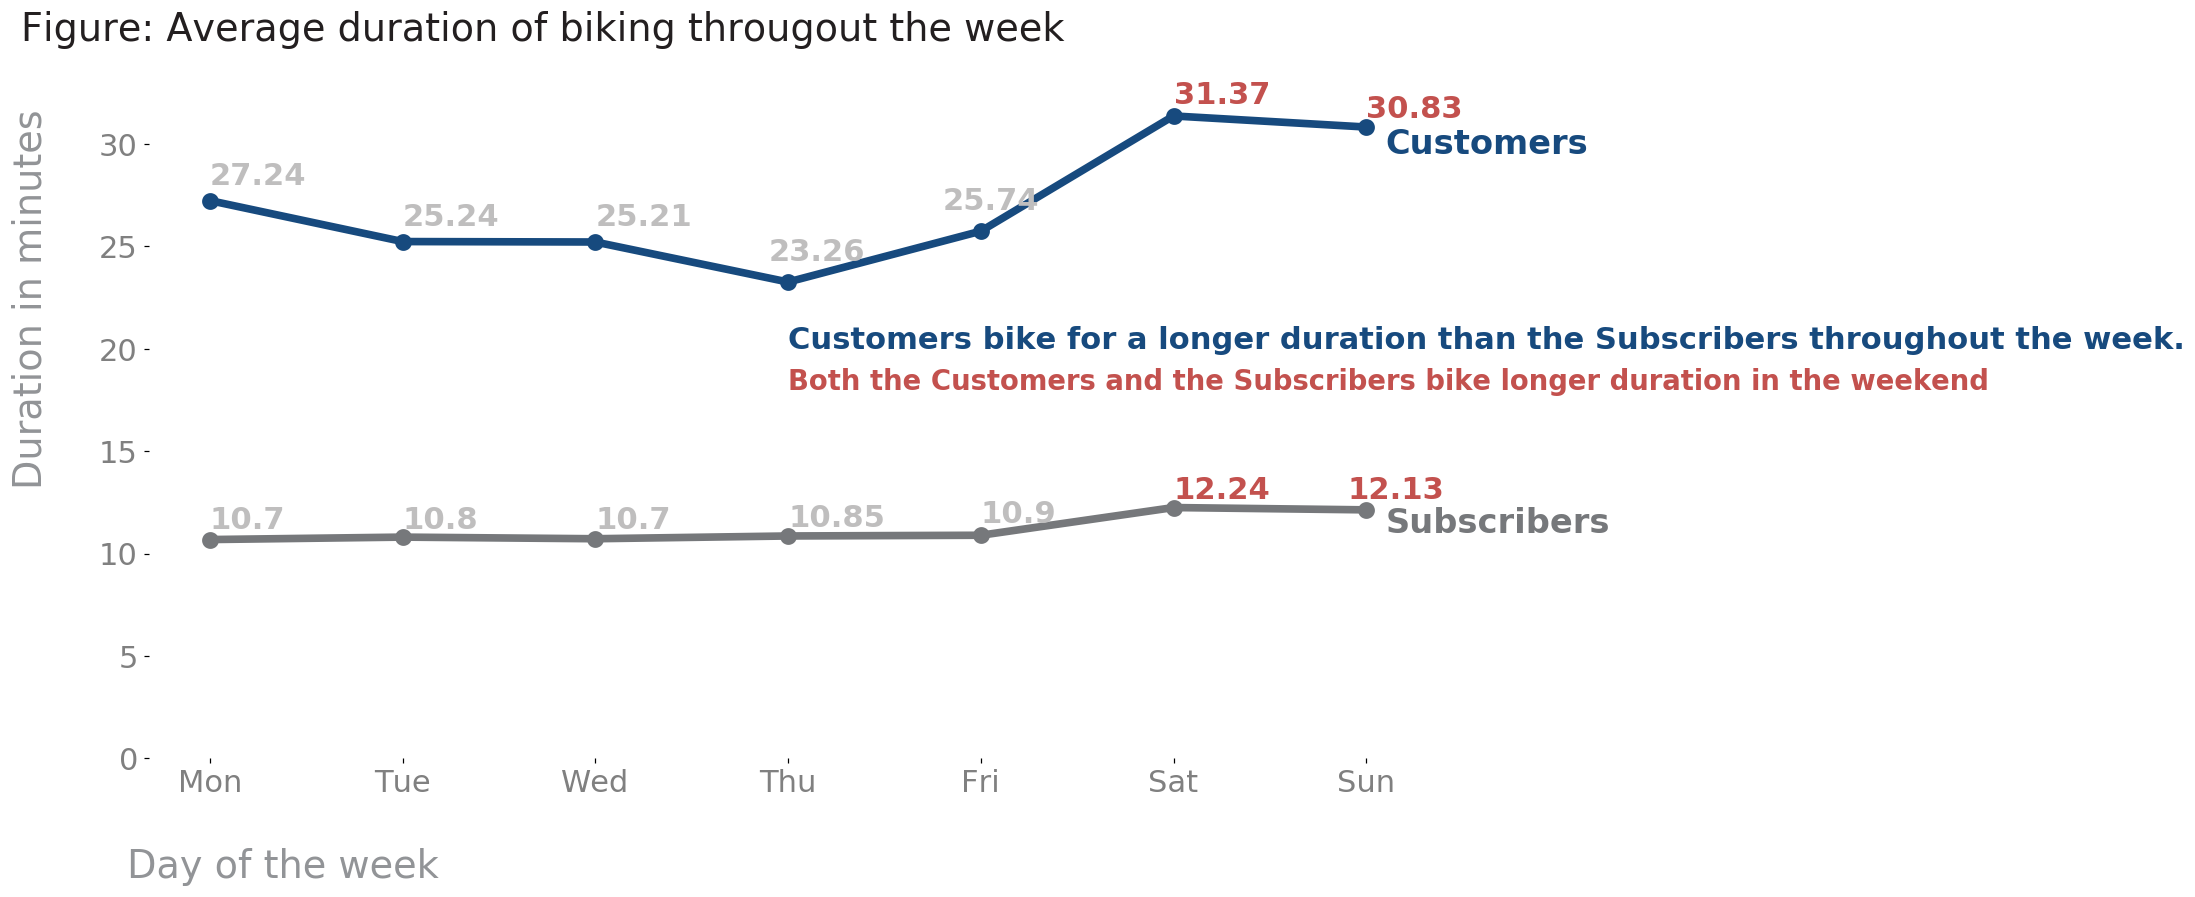

In [13]:
#plot size
plt.figure(figsize = [15, 8], dpi=110)    

# lineplot and show the value points with scatter
plt.plot('day','cus_avg_duration', data=user_type_duration, color = BLUE1, linewidth=5)
plt.scatter('day','cus_avg_duration', data=user_type_duration, color = BLUE1, linewidth=5)

#show the calues
plt.text(0, 28, '27.24', color=GRAY9, fontweight='bold',fontsize=20)
plt.text(1, 26, '25.24', color=GRAY9, fontweight='bold',fontsize=20)
plt.text(2, 26, '25.21', color=GRAY9, fontweight='bold',fontsize=20)
plt.text(2.9, 24.3,'23.26', color=GRAY9, fontweight='bold',fontsize=20)
plt.text(3.8,26.8,'25.74', color=GRAY9, fontweight='bold',fontsize=20)
plt.text(5, 32, '31.37', color=RED1,fontweight='bold',fontsize=20)
plt.text(6, 31.3,'30.83', color=RED1,fontweight='bold',fontsize=20)
plt.text(6.1,29.55,'Customers', color=BLUE1, fontweight='bold', fontsize=22)
# lineplot and show the value points with scatter
plt.plot('day','sub_avg_duration', data=user_type_duration , color=GRAY5, linewidth=5)
plt.scatter('day','sub_avg_duration', data=user_type_duration , color=GRAY5, linewidth=5)

#show the calues
plt.text(0, 11.2,'10.7', color=GRAY9, fontweight='bold',fontsize=20)
plt.text(1, 11.2, '10.8', color=GRAY9, fontweight='bold',fontsize=20)
plt.text(2, 11.2,'10.7', color=GRAY9, fontweight='bold',fontsize=20)
plt.text(3, 11.3,'10.85', color=GRAY9, fontweight='bold',fontsize=20)
plt.text(4, 11.5,'10.9', color=GRAY9, fontweight='bold',fontsize=20)
plt.text(5, 12.7,'12.24', color=RED1, fontweight='bold',fontsize=20)
plt.text(5.9, 12.7,'12.13', color=RED1, fontweight='bold',fontsize=20)
plt.text(6.1,11,'Subscribers',color=GRAY5, fontweight='bold',fontsize=22)

#removing border
sns.despine(bottom=True, left=True)

#x and y labels, plot title declaration 
plt.xlabel(" \n Day of the week",fontsize=25,color=GRAY7, x=0.1)
plt.ylabel("Duration in minutes \n",fontsize=25,color=GRAY7, y=0.7)
plt.title('Figure: Average duration of biking througout the week\n',fontsize=25,loc="left", color=GRAY1, x=-0.10, y=1)
plt.yticks(np.arange(0, 35,5),fontsize=20, color ='grey')
plt.xticks(user_type_duration['day'],fontsize=20, color ='grey')


#adding notes to the figure
plt.text(3,20,'Customers bike for a longer duration than the Subscribers throughout the week.', 
         fontsize=20, color=BLUE1, linespacing=1.4,fontweight='bold')

plt.text(3, 18,'Both the Customers and the Subscribers bike longer duration in the weekend',
         fontsize=18, color=RED1,fontweight='bold')


#show plot
plt.show()

### Observations


**1.** Customers in average bike for a longer duration than the Subscribers.

**2.** Botht he Customers and the Subscribers bike a longer duration during the weekends. 


**4-B.Average duration of journeys by the Subscribers and Customers Across the days of the season.**

In [14]:
#average duration of journey per season- in weekdays and weekend
duration_per_season = df_time.groupby(['season', 'day_type']).mean().duration_min.reset_index().sort_values('duration_min', ascending=False)
duration_per_season

,season,day_type,duration_min
5,Summer,Weekend,21.581092
1,Autumn,Weekend,16.763209
3,Spring,Weekend,15.242106
7,Winter,Weekend,15.067248
4,Summer,Weekday,13.378767
0,Autumn,Weekday,12.287450
2,Spring,Weekday,11.643097
6,Winter,Weekday,11.479699


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


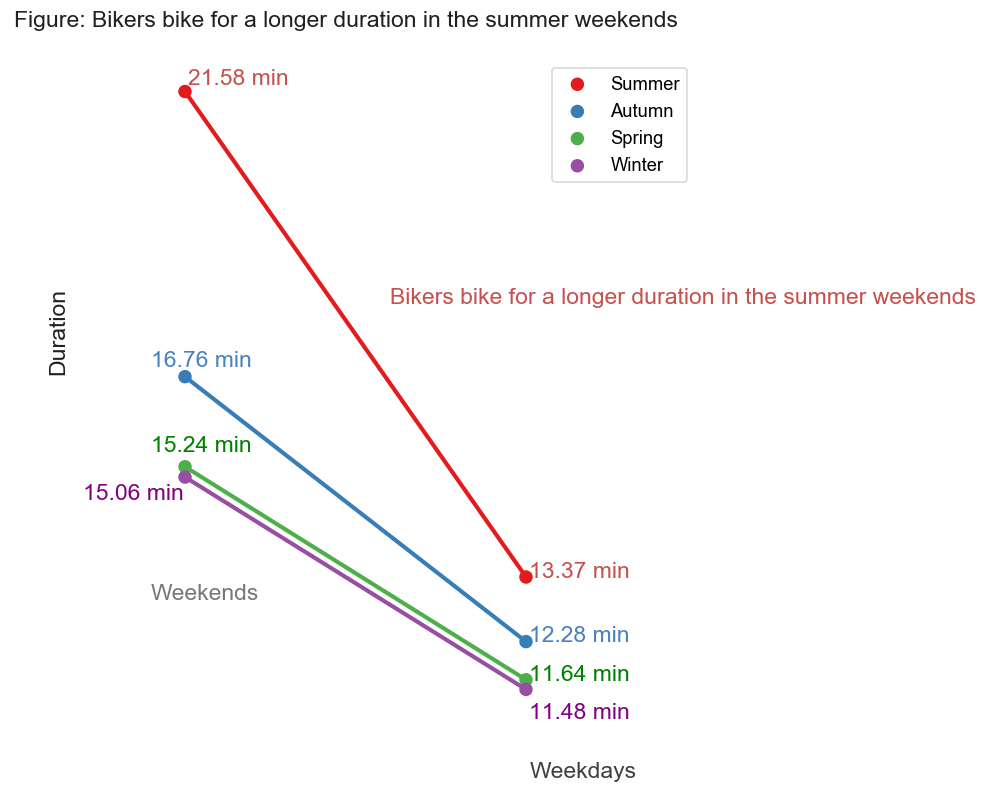

In [15]:
#plotting figure
fig = plt.figure(figsize = [8, 8], dpi=110)
ax = sns.pointplot(x="day_type", y="duration_min", hue="season", data= duration_per_season, palette="Set1")
ax = fig.add_subplot(111)

#empty label
plt.xlabel("")
plt.ylabel("")
ax.set_xticks([]) 
ax.set_yticks([])

#title of the plot and legend
plt.title('Figure: Bikers bike for a longer duration in the summer weekends\n',fontsize=15, loc="left", color=GRAY1)
plt.legend(loc='upper right', fontsize=12)

#removing borders
sns.set_style("whitegrid", {'axes.grid' : False})

#adding notes to show datapoints
plt.text(0.6,18,'Bikers bike for a longer duration in the summer weekends', fontsize=15, color=RED1, linespacing=1.4)
plt.text(0.01, 21.7,'21.58 min', fontsize=15, color=RED1, linespacing=1.4)
plt.text(1.01, 13.37,'13.37 min', fontsize=15, color=RED1, linespacing=1.4)
plt.text(-0.1,16.94,'16.76 min', fontsize=15, color=BLUE2, linespacing=1.4)
plt.text(1.01,12.3,'12.28 min', fontsize=15, color=BLUE2, linespacing=1.4)
plt.text(-0.1,15.5,'15.24 min', fontsize=15, color='green', linespacing=1.4)
plt.text(1.01,11.64,'11.64 min', fontsize=15, color='green', linespacing=1.4)
plt.text(-.3,14.7,'15.06 min', fontsize=15, color='purple', linespacing=1.4)
plt.text(1.01,11.0,'11.48 min', fontsize=15, color='purple', linespacing=1.4)
plt.text(1.01,10,'Weekdays', fontsize=15, color=GRAY2, linespacing=1.4)
plt.text(-0.1,13,'Weekends', fontsize=15, color=GRAY5, linespacing=1.4)
plt.text(-0.4,18,'Duration', fontsize=15, color=GRAY1, linespacing=1.4, rotation=90)

#removing borders
sns.despine(bottom=True, left=True)

#showthe plot
plt.show()

### Observations


**1.** Bikers bike the longest during the Summer Weekends.

**2.** Bikers bike the shortest period in the winter weekdays. 

**3.** Bikers bike for a longer duration in the weekends across all the seasons.

**4-C. Duration Category**

In [16]:
#percentage per duration category
duration_cat = df.groupby(['dur_cat']).size()/df.groupby(['dur_cat']).size().sum()*100
duration_cat = duration_cat.reset_index(name='percentage')
duration_cat

,dur_cat,percentage
0,1-15 min,78.279373
1,16-30 min,17.807182
2,>30 min,3.913445


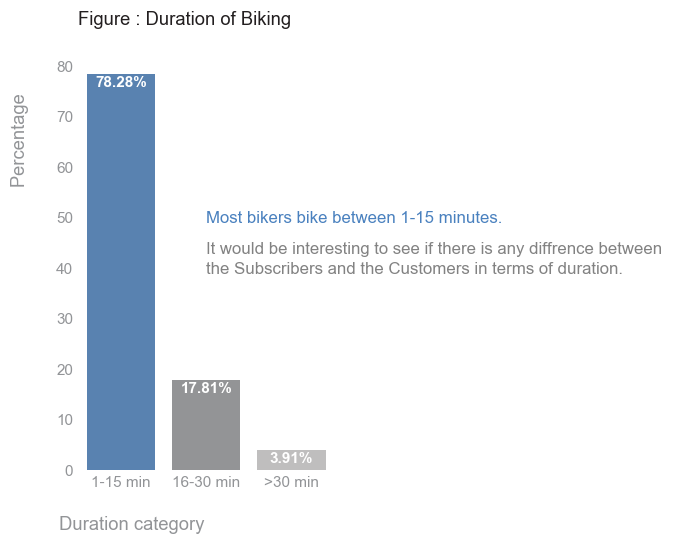

In [17]:
#chosing colors 
clrs = [BLUE2, GRAY7, GRAY9]

#plotting the figure
plt.figure(figsize = [3, 5], dpi=110)
ax = sns.barplot(x=duration_cat['dur_cat'], y=duration_cat['percentage'], palette=clrs)


# x and y tick labels
plt.yticks(np.arange(0, 90, 10), fontsize=10,color=GRAY7)
plt.xticks(fontsize=10,color=GRAY7)

# x and y data labels and title
plt.xlabel(" \n Duration category",fontsize=12,color=GRAY7, x=0.2)
plt.ylabel("Percentage \n",fontsize=12,color=GRAY7, y=0.8)
plt.title('Figure : Duration of Biking\n',fontsize=12,loc="left", color=GRAY1, y=1.0)

plt.text(1, 45,'Most bikers bike between 1-15 minutes.\n', fontsize=11, color=BLUE2, linespacing=1.4)
plt.text(1, 35,'It would be interesting to see if there is any diffrence between'
         '\nthe Subscribers and the Customers in terms of duration.\n', fontsize=11, color=GRAY6, linespacing=1.4)


# get the values to annotate
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = -10 # Number of points between bar and label. 
    va = 'bottom' # Vertical alignment for positive values

    label = "{:.2f}%".format(y_value) # Use Y value as label and format number with two decimal place

    # Create annotation
    plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', 
                 va=va,fontsize=10, color= 'white',fontweight='bold')
    sns.despine(bottom=True, left=True)
    
   

### Observations

**1.** Bikers mostly prefer shorter journeys which are in the range of 1-15 minutes.

**2.** Only the handful of the bikers bike for more than 30 minutes. As we have seen before these are mostly the customers in the weekends. 


In [18]:
#delcaring dataframe for Customers and Subscribers
df_customers = df.query('user_type== "Customer"')
df_subscribers = df.query('user_type== "Subscriber"')

In [19]:
#percentage of Subscribers per duration category
sub_duration_cat = df_subscribers.groupby(['dur_cat']).size()/df_subscribers.groupby(['dur_cat']).size().sum()*100
sub_duration_cat = sub_duration_cat.reset_index(name='subscribers percentage')
sub_duration_cat

,dur_cat,subscribers percentage
0,1-15 min,81.753376
1,16-30 min,15.731861
2,>30 min,2.514763


In [20]:
#percentage of Custoemrs per duration category
cus_duration_cat = df_customers.groupby(['dur_cat']).size()/df_customers.groupby(['dur_cat']).size().sum()*100
cus_duration_cat  = cus_duration_cat .reset_index(name='customers percentage')
cus_duration_cat

,dur_cat,customers percentage
0,1-15 min,51.247647
1,16-30 min,33.955561
2,>30 min,14.796792


In [21]:
#merging two dataframe
duration_per_user = pd.merge(sub_duration_cat, cus_duration_cat)
duration_per_user

,dur_cat,subscribers percentage,customers percentage
0,1-15 min,81.753376,51.247647
1,16-30 min,15.731861,33.955561
2,>30 min,2.514763,14.796792


<Figure size 660x440 with 0 Axes>

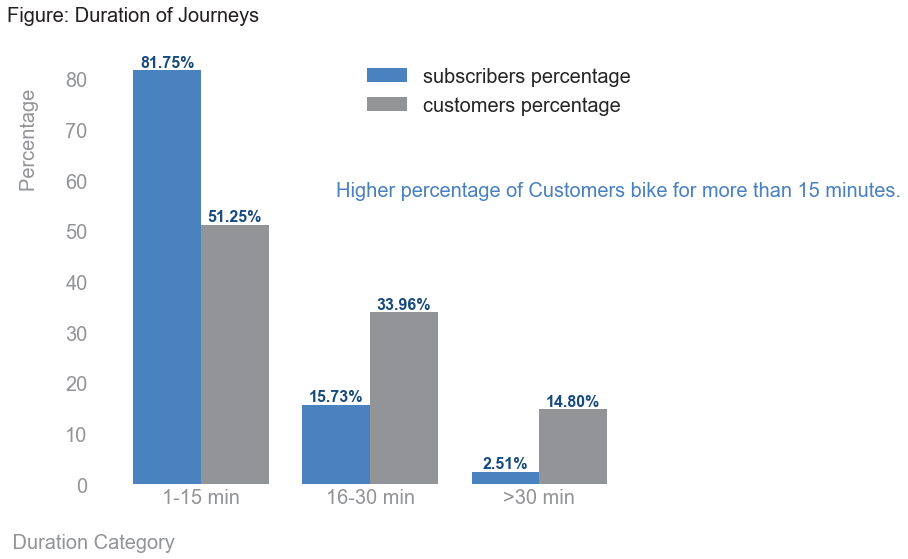

In [22]:
#new dataframe delclaration
sub_percentage = duration_per_user['subscribers percentage']
cus_percentage = duration_per_user['customers percentage']
plt.figure(dpi=110)
df_new = pd.DataFrame({'subscribers percentage': sub_percentage,
                  'customers percentage': cus_percentage})

#plot, labeling and adding notes
ax = df_new.plot.bar(rot=0, color=[BLUE2, GRAY7],width=0.8, figsize = (10,8))
sns.set_style("whitegrid", {'axes.grid' : False}) #white background

# x and y data labels and title
plt.yticks(np.arange(0, 85, 10), fontsize=20,color=GRAY7)
plt.xticks(fontsize=20,color=GRAY7)
plt.legend(fontsize=20, loc= 'upper right')

plt.xlabel(" \n Duration Category",fontsize=20,color=GRAY7, x=0)
plt.ylabel("Percentage \n",fontsize=20,color=GRAY7, y=0.8)
plt.title('Figure: Duration of Journeys\n',fontsize=20,loc="left", color=GRAY1, x=-0.15)

plt.text(.8, 52,'Higher percentage of Customers bike for more than 15 minutes.\n'
         , fontsize=20, color=BLUE2, linespacing=1.4)


sns.despine(bottom=True, left=True) #remove bottom and left border

# get the values to annotate
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 0 # Number of points between bar and label. 
    va = 'bottom' # Vertical alignment for positive values

    label = "{:.2f}%".format(y_value) # Use Y value as label and format number with tw0 decimal place

    # Create annotation
    plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', 
                 va=va,fontsize=16, color= BLUE1,fontweight='bold')


ax.set_xticklabels( ('1-15 min', '16-30 min','>30 min') )

plt.show()

### Observations


 **1.** The larger number of subscribers prefer shorter journeys which are in the range of 1-15 minutes.

**2.** When it comes to biking more than 15 minutes, almost half of the Customers prefer that. This indicates the subscribers take shorter journeys while almost half of the Customers taking shorter journeys. 


### 5. How far do the bikers bike?

**Visuals**: In answering the question we will mostly use bar plots and stacked bar plots as we will be analysing distance category, and the distance crossed per user type- the Subscribers and the Customers. 


**5-A What is average biking distance for the bikers? Show the distribution of distance for the bikers.**

In [23]:
# new dataframe with non-zero distance 
df_distance  = df.query('distance!=0')

In [24]:
#Show the new dataframe with non-zero distance 
df_distance.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,year,str_month_no,start_hour,end_hour,duration_min,day_type,age,season,distance,dur_cat
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,...,2018,1,22,19,1254.733333,Weekday,32,Winter,2.488001,>30 min
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,...,2018,1,14,10,1192.933333,Weekday,22,Winter,2.972357,>30 min
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,...,2018,1,19,6,666.100000,Weekday,27,Winter,2.443038,>30 min
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,...,2018,1,23,0,7.550000,Weekday,30,Winter,1.340181,1-15 min
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,...,2018,1,23,23,3.000000,Weekday,38,Winter,0.631765,1-15 min


In [25]:
#average biking distance for the bikers in kilometers
df_distance['distance'].mean()

1.6363865335006216

In [26]:
#median biking distance for the bikers in kilometers
df_distance['distance'].median()

1.4016701295609715

In [27]:
#maximum biking distance for the bikers in kilometers
df_distance['distance'].max()

65.30812497282311

In [28]:
# Creates bin edges for distance of biking
bin_edges = [0, 1.5, 3, 65]
# Creates bin names based on the distance
bin_names = ['0-1.5','1.5-3','>3']

# Creates distance category column based on the distance biked
df_distance['distance_cat'] = pd.cut(df_distance['distance'], bin_edges, labels = bin_names)
df_distance.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,str_month_no,start_hour,end_hour,duration_min,day_type,age,season,distance,dur_cat,distance_cat
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,...,1,22,19,1254.733333,Weekday,32,Winter,2.488001,>30 min,1.5-3
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,...,1,14,10,1192.933333,Weekday,22,Winter,2.972357,>30 min,1.5-3


In [29]:
#percentage per biking distance category
distance_cat = df_distance.groupby(['distance_cat']).size()/df_distance.groupby(['distance_cat']).size().sum()*100
distance_cat = distance_cat.reset_index(name='percentage').sort_values('percentage', ascending= False)
distance_cat

,distance_cat,percentage
0,0-1.5,54.380109
1,1.5-3,35.582727
2,>3,10.037164


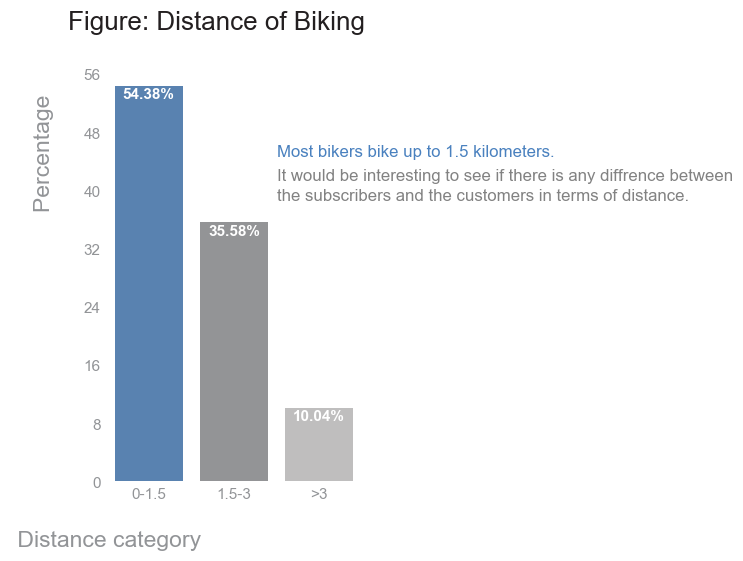

In [30]:

#chosing colors 
clrs = [BLUE2, GRAY7, GRAY9]

#plot the figure and label data
plt.figure(figsize = [3, 5], dpi=110)
ax = sns.barplot(x=distance_cat['distance_cat'], y=distance_cat['percentage'], palette=clrs, )

y_data = pd.Series(distance_cat['percentage'])
x_labels = distance_cat['distance_cat']

#y axis value
plt.yticks(np.arange(0, 60, 8), fontsize=10,color=GRAY7)
plt.xticks(fontsize=10,color=GRAY7)

#labeling and adding notes
plt.xlabel(" \n Distance category",fontsize=15,color=GRAY7, x=0)
plt.ylabel("Percentage \n",fontsize=15,color=GRAY7, y=0.8)
plt.title('Figure: Distance of Biking\n',fontsize=17,loc="left", color=GRAY1, x=-0.15)

plt.text(1.5, 42,'Most bikers bike up to 1.5 kilometers.\n', fontsize=11, color=BLUE2, linespacing=1.4)
plt.text(1.5, 36,'It would be interesting to see if there is any diffrence between'
         '\nthe subscribers and the customers in terms of distance.\n', fontsize=11, color=GRAY6, linespacing=1.4)


# values to annotate
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = -10 # Number of points between bar and label. 
    va = 'bottom' # Vertical alignment for positive values

    label = "{:.2f}%".format(y_value) # Use Y value as label and format number with tw0 decimal place

    # Create annotation
    plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', 
                 va=va,fontsize=10, color= 'white',fontweight='bold')
    sns.despine(bottom=True, left=True)
    
   

### Observation


More than 50% of the bikers prefer shorter journeys which are in the range of 0-1.5 kilometres. We would like to see what is the difference between the Customers and the Subscribers and that will explain if this is due to the preference of the Subscribers as they are larger in number.



**5-B Does the distance very per user type?**

In [31]:
#subscribers and customers with non-zero biking distance
df_customer_distance = df_customer.query('distance !=0')
df_subscriber_distance = df_subscriber.query('distance !=0')

In [32]:
#mean distance for customers
df_customer_distance.distance.mean()

1.9068992747958522

In [33]:
#mean distance for subscribers
df_subscriber_distance.distance.mean()

1.6022592772696638

In [88]:
# Creates bin edges for distance of biking
bin_edges = [0, 1.5, 3, 65]
# Creates bin names based on the distance
bin_names = ['0-1.5', '1.5-3','>3']

# Creates distance category column based on the distance biked
df_subscriber_distance['distance_cat'] = pd.cut(df_subscriber_distance['distance'], bin_edges, labels = bin_names)
df_customer_distance['distance_cat'] = pd.cut(df_customer_distance['distance'], bin_edges, labels = bin_names)

In [35]:
#Customers per biking distance category
df_cus_distance =  df_customer_distance['distance_cat'].value_counts()/df_customer_distance['distance_cat'].value_counts().sum()*100
df_cus_distance = df_cus_distance.rename_axis('category').reset_index(name='customer percetnage')
df_cus_distance

,category,customer percetnage
0,0-1.5,42.333590
1,1.5-3,42.328588
2,>3,15.337822


In [36]:
#Subscribers per biking distance category
df_sub_distance =  df_subscriber_distance['distance_cat'].value_counts()/df_subscriber_distance['distance_cat'].value_counts().sum()*100
df_sub_distance = df_sub_distance.rename_axis('category').reset_index(name='subscriber percetnage')
df_sub_distance

,category,subscriber percetnage
0,0-1.5,55.376749
1,1.5-3,35.574325
2,>3,9.048926


In [37]:
# merging two dataframe
user_distance = pd.merge(df_cus_distance, df_sub_distance)
user_distance

,category,customer percetnage,subscriber percetnage
0,0-1.5,42.333590,55.376749
1,1.5-3,42.328588,35.574325
2,>3,15.337822,9.048926


In [38]:
#new dataframe
A = user_distance['subscriber percetnage']
B = user_distance['customer percetnage']
df_new_2 = pd.DataFrame ({'Subscriber distance':A,
                        'Customer distance':B})
df_new_2

,Subscriber distance,Customer distance
0,55.376749,42.333590
1,35.574325,42.328588
2,9.048926,15.337822


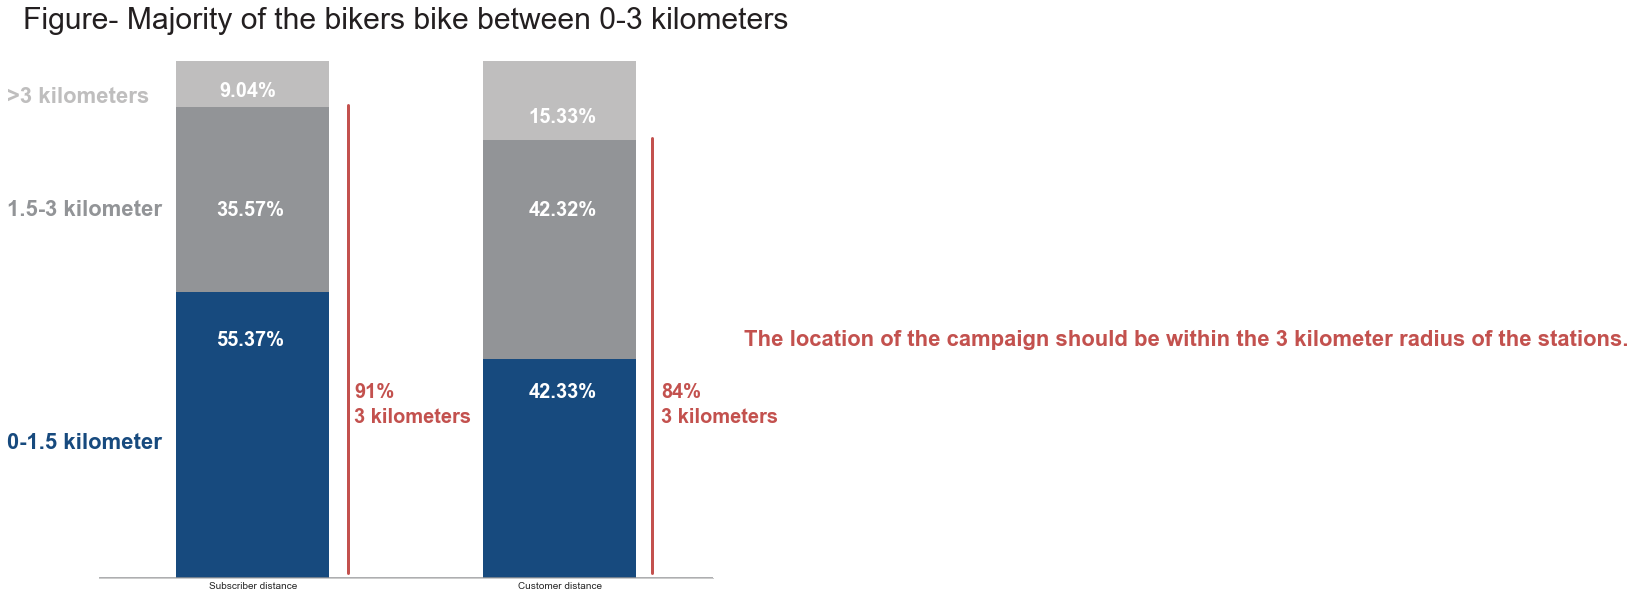

In [39]:
#plottig 
ax= df_new_2.T.plot.bar(stacked=True, rot=0, color=[BLUE1, GRAY7,GRAY9],width=0.5, figsize = (11,10))


#removign left and bottom borders

sns.despine(bottom=False, left=True)

# Plot the figure.
plt.legend("")
plt.xlabel("",fontsize=10)

plt.rc('xtick',labelsize=37,color = GRAY7)
plt.ylabel("")
ax.set_yticks([])
plt.title('Figure- Majority of the bikers bike between 0-3 kilometers', x=0.5, fontsize=30, color=GRAY1)


#adding ntoes
plt.text(-0.8,25, "0-1.5 kilometer", color = BLUE1, fontsize=22,fontweight='bold')
plt.text(-0.8,70, "1.5-3 kilometer", color = GRAY7, fontsize=22,fontweight='bold')
plt.text(-0.8,92, ">3 kilometers", color = GRAY9, fontsize=22,fontweight='bold')

plt.text(-0.12,45, "55.37%", color = 'white', fontsize=20,fontweight='bold' )
plt.text(-0.12,70, "35.57%", color = 'white', fontsize=20,fontweight='bold')
plt.text(-0.11,93, "9.04%", color = 'white', fontsize=20,fontweight='bold')

plt.text(0.9,35, "42.33%", color = 'white', fontsize=20,fontweight='bold')
plt.text(0.9,70, "42.32%", color = 'white', fontsize=20,fontweight='bold')
plt.text(0.9,88, "15.33%", color = 'white', fontsize=20,fontweight='bold')
plt.text(1.6,45, "The location of the campaign should be"
         " within the 3 kilometer radius of the stations.", color = RED1, fontsize=22,fontweight='bold')


#vertical lines and adding notes next to lines
ax.axvline(0.31, ymin=0.01, ymax=0.87, color=RED1, linewidth=3)
plt.text(0.33,35, "91%", color = RED1, fontsize=20,fontweight='bold')
plt.text(0.33,30, "3 kilometers", color = RED1, fontsize=20,fontweight='bold')

ax.axvline(1.3, ymin=0.01, ymax=0.81, color=RED1, linewidth=3)
plt.axhline(y=0, xmin=0, xmax=1.2, linewidth=2.5, color=GRAY7)
plt.text(1.33,35, "84%", color = RED1, fontsize=20,fontweight='bold')
plt.text(1.33,30, "3 kilometers", color = RED1, fontsize=20,fontweight='bold')
plt.show()

### Observations


**1.** More than half of the Subscribers bike a distance less than or equal to 1.5 kilometres.

**2.** An almost equal number of Customers bike for a distance of 0-1.5 kilometre and 0-3 kilometres. 

**3.** We can see that the Subscribers prefer shorter journeys in terms of distance and duration. 

**4.** Since the objective of the campaign is to reach the largest number of people, it should be within the 3-kilometre radius of the station.

**5-C Which days of the week the bikers bike the longest?**

In [40]:
#distance per day
distance_per_day = df_distance.groupby(['day']).mean().distance
distance_per_day

day
Fri    1.642836
Mon    1.638944
Sat    1.630307
Sun    1.598277
Thu    1.638481
Tue    1.639718
Wed    1.642056
Name: distance, dtype: float64

In [41]:
#new index
new_index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [42]:
#reindexing as per new index
distance_per_day = distance_per_day.reindex(new_index)
distance_per_day

day
Mon    1.638944
Tue    1.639718
Wed    1.642056
Thu    1.638481
Fri    1.642836
Sat    1.630307
Sun    1.598277
Name: distance, dtype: float64

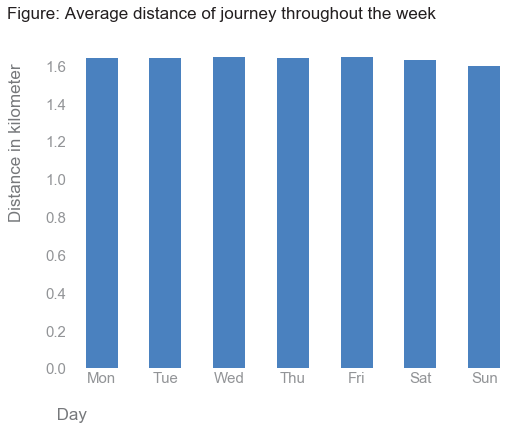

In [43]:
#plotting figure
plt.figure(figsize = [8, 6])
distance_per_day.plot(kind='bar', color = BLUE2,rot=0 )
sns.despine(bottom=True, left=True)
plt.xlabel(" \n Day",fontsize=17,color=GRAY5, x=0)
plt.ylabel("Distance in kilometer \n",fontsize=17,color=GRAY5, y=0.7)
plt.title('Figure: Average distance of journey throughout the week\n',fontsize=17,loc="left", color=GRAY1, x=-0.14)
plt.xticks(fontsize=15,color=GRAY7)
plt.yticks(fontsize=15,color=GRAY7)
plt.show()

### Observation

Average distance does not vary significantly across the days of the week.

In [44]:
#g = sns.FacetGrid(data = df, hue = 'user_type', size = 10,
                 #palette = 'colorblind')
#g.map(plt.scatter, 'duration_min','distance')
#g.add_legend()

**5-D Which month the bikers bike for the longest distance? **

In [45]:
# average distance of the subscribers per day of each month 
df_subscriber_distance.groupby(['month']).mean().distance

month
Apr    1.586174
Aug    1.585064
Dec    1.604877
Feb    1.611917
Jan    1.629823
Jul    1.505680
Jun    1.453025
Mar    1.588019
May    1.599686
Nov    1.625987
Oct    1.626085
Sep    1.610447
Name: distance, dtype: float64

In [46]:
# average distance of the customers per day of each month 
df_customer_distance.groupby(['month']).mean().distance

month
Apr    1.891816
Aug    1.891089
Dec    1.918756
Feb    1.921337
Jan    1.952272
Jul    1.757843
Jun    1.503811
Mar    1.901480
May    1.862059
Nov    1.913855
Oct    2.000001
Sep    1.966983
Name: distance, dtype: float64

In [47]:
# average distance of the subscribers per day of each season
df_subscriber_distance.groupby(['season', 'day_type']).mean().distance

season  day_type
Autumn  Weekday     1.628664
        Weekend     1.570067
Spring  Weekday     1.602694
        Weekend     1.526226
Summer  Weekday     1.554615
        Weekend     1.564482
Winter  Weekday     1.625071
        Weekend     1.556768
Name: distance, dtype: float64

In [48]:
# average distance of the customers per day of each season
df_customer_distance.groupby(['season', 'day_type']).mean().distance

season  day_type
Autumn  Weekday     1.988238
        Weekend     1.905354
Spring  Weekday     1.907891
        Weekend     1.816354
Summer  Weekday     1.850833
        Weekend     1.824493
Winter  Weekday     1.935758
        Weekend     1.917346
Name: distance, dtype: float64

**11.Note: When it comes to distance, months and season doesnot have a significant impact.**

## 6. What is the age distribution of the bikers?

**Visual**: In answering the question we will mostly use box plots and violin plots. These two plots are great in exploring numerical statistical data and can help us visualize the distribution. In box plot we can see the lowest boundary, 25% percentile, Median- indicates the 50% percentile, 75% percentile, Maximum value and the Outliers. From the violin plot, we can observe which numbers have a higher frequency as the curve gets wider in the higher frequency region. 

We will also show distribution of the age groups using distplot and stacked bar plot will be used to show the age categories.


In [49]:
# see the summary statstics of age
df.describe().age

count    1.651156e+06
mean     3.516587e+01
std      1.046455e+01
min      1.800000e+01
25%      2.800000e+01
50%      3.300000e+01
75%      4.100000e+01
max      1.370000e+02
Name: age, dtype: float64

### Some of the ages are clearly wrong. Hence, we limit our analysis on the portion of the population with that falls  within the significant category.

In [50]:
# Drop 13 columns that are not currently needed and delcare a new dataframe
df_age= df.drop(['duration_sec','start_time','end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude','end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id','member_birth_year', 'str_month_no', 'start_hour', 'end_hour', 'season', 'month', 'day', 'year' ], axis=1)

In [51]:
#show first three rows of the new dataframe
df_age.head(3)

,user_type,member_gender,duration_min,day_type,age,distance,dur_cat
0,Subscriber,Male,1254.733333,Weekday,32,2.488001,>30 min
2,Customer,Male,1192.933333,Weekday,22,2.972357,>30 min
4,Subscriber,Male,666.100000,Weekday,27,2.443038,>30 min


In [52]:
#new dataframe summary 
df_age.describe().age

count    1.651156e+06
mean     3.516587e+01
std      1.046455e+01
min      1.800000e+01
25%      2.800000e+01
50%      3.300000e+01
75%      4.100000e+01
max      1.370000e+02
Name: age, dtype: float64

Text(0,140,'As per the data, some users are more than 130 years old.\nThis clearly indicates erroneous data.')

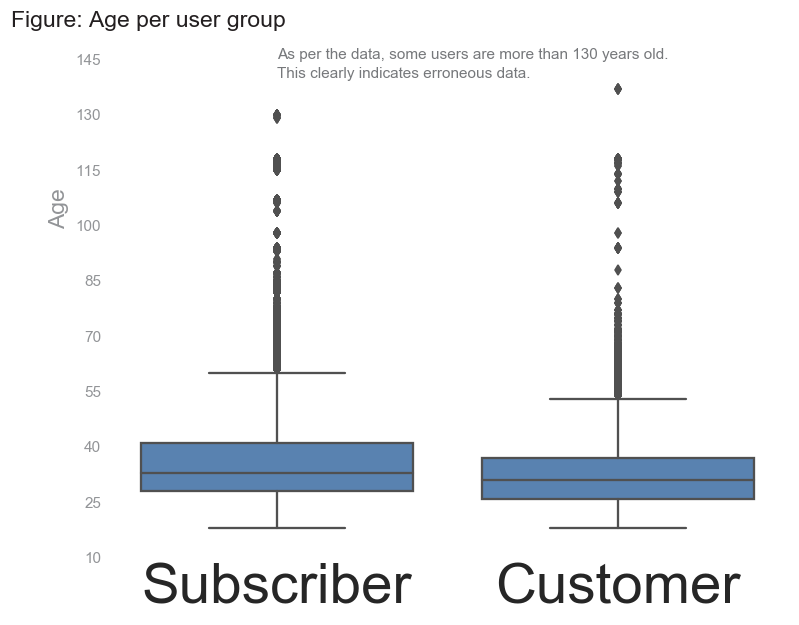

In [53]:
#plotting the figure
plt.figure(figsize = [8, 6], dpi=110)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.boxplot(data = df, x = 'user_type', y = 'age', color = BLUE2)
plt.title('Figure: Age per user group\n',fontsize=15,loc="left", color = GRAY1, x=-0.14)
plt.xlabel("",fontsize=15)
plt.ylabel("Age",fontsize=15,color = GRAY7, y=0.7)
plt.rc('xtick',labelsize=10,color = GRAY7)
plt.rc('ytick',labelsize=15,color = GRAY7)
plt.yticks(np.arange(10, 150, 15),color = GRAY7)
sns.despine(bottom=True, left=True)
plt.text(0, 140, 'As per the data, some users are more than 130 years old.\nThis clearly indicates erroneous data.', fontsize=10, color=GRAY5, linespacing=1.4)

## Observation

Both the Customers and Subscribers have age outliers marked by the dots in the boxplot. 

Text(0.2,140,'Error in the data exists for all gender types.')

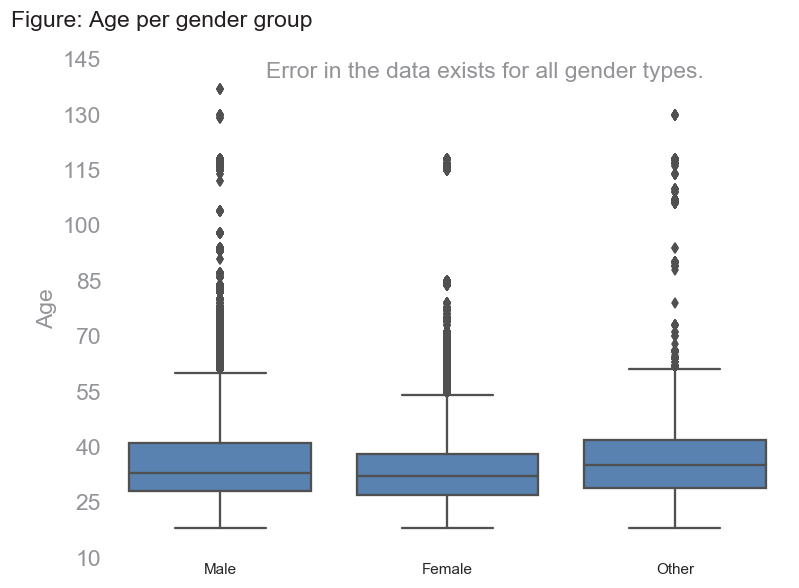

In [54]:
#plotting the figure
plt.figure(figsize = [8, 6], dpi=110)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.boxplot(data = df, x = 'member_gender', y = 'age', color = BLUE2)
plt.title('Figure: Age per gender group\n',fontsize=15,loc="left", color = GRAY1, x=-0.14)
plt.xlabel("",fontsize=15)
plt.ylabel("Age",fontsize=15,color = GRAY7)
plt.rc('xtick',labelsize=15,color = GRAY7)
plt.yticks(np.arange(10, 150, 15),color = GRAY7)
sns.despine(bottom=True, left=True)
plt.text(0.2, 140, 'Error in the data exists for all gender types.', fontsize=15, color=GRAY7, linespacing=1.4)

## Observation

All the genders have age outliers marked by the dots in the boxplot. 

In [55]:
# Calculaitng 99% percentile
ninetynine_percentile_age = np.percentile(df.age, 99)
ninetynine_percentile_age

65.0

In [56]:
# median age of the population 
df['age'].median()

33.0

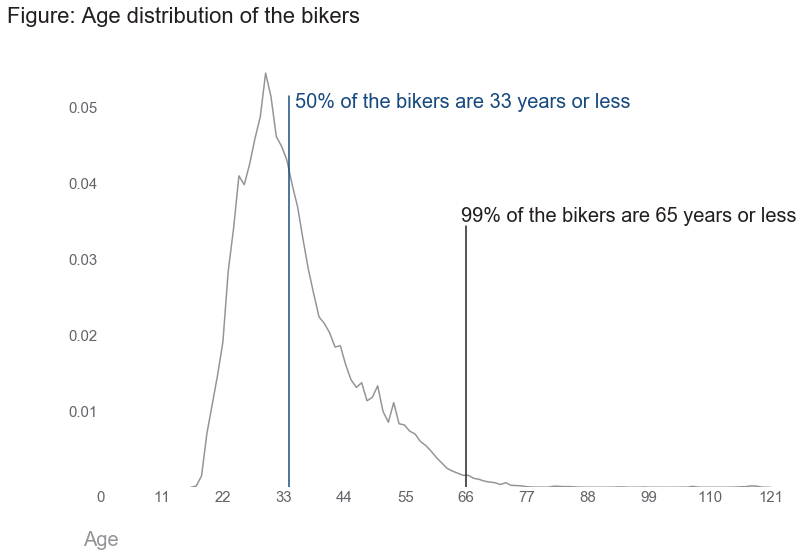

In [57]:
#plotting the figure
plt.figure(figsize = [12, 8])
sns.set_style("whitegrid", {'axes.grid' : False})
bin_edges = np.arange(13, df['age'].max()+1, 20)
sns.distplot(df['age'], bins = bin_edges, kde = True, hist=False, color=GRAY7)
plt.axvline(x=66, ymin = -0.1, ymax = 0.6, color = GRAY1)
plt.axvline(x=34, ymin = -0.1, ymax = 0.9, color = BLUE1)
plt.title('Figure: Age distribution of the bikers \n',fontsize=22,loc="left", color=GRAY1, x=-.14)
plt.xlabel("\nAge",fontsize=20, color=GRAY7, x=0)
#plt.ylabel("Proportion\n",fontsize=20, color=GRAY4)
plt.text(65,.035, "99% of the bikers are 65 years or less", color = GRAY1, fontsize=20)
plt.text(35,.05, "50% of the bikers are 33 years or less", color = BLUE1, fontsize=20)
#plt.text(-0.15,-0.01,'Age', fontsize=20)

#plt.text(-0.165,-0.01,'Age', fontsize=22)

plt.xlim(0, 120)
plt.yticks(np.arange(0.01, 0.06,0.01),color=GRAY4)
plt.xticks(np.arange(0, 132,11),color=GRAY4)
plt.rc('xtick',labelsize=20,color=GRAY4)
plt.rc('ytick',labelsize=20,color=GRAY4)
sns.despine(bottom=True, left=True)

## Observation


**1.** 50% of the people are 33 years or younger.

**2.** 99% of the people are 65 years or younger as can be seen from the figure.




**11.Note: We can see that the 99% of the people are 65 years or younger. Hence, we exclude the population of age higher than 66 years from our analysis for convenience.**

In [58]:
#declaring a dataframe with the people age under 66
df_under66= df_age.query('age < 66')
df_under66.head()

,user_type,member_gender,duration_min,day_type,age,distance,dur_cat
0,Subscriber,Male,1254.733333,Weekday,32,2.488001,>30 min
2,Customer,Male,1192.933333,Weekday,22,2.972357,>30 min
4,Subscriber,Male,666.100000,Weekday,27,2.443038,>30 min
6,Subscriber,Male,7.550000,Weekday,30,1.340181,1-15 min
7,Subscriber,Male,3.000000,Weekday,38,0.631765,1-15 min


In [59]:
#Summarys stastics of customer age who are under 66
df_under66.describe().age

count    1.635247e+06
mean     3.478923e+01
std      9.705738e+00
min      1.800000e+01
25%      2.800000e+01
50%      3.300000e+01
75%      4.000000e+01
max      6.500000e+01
Name: age, dtype: float64

In [60]:
#declaring a dataframe with the people age under 66- Subscribers
df_sub_under66 = df_under66.query('user_type =="Subscriber"')

#declaring a dataframe with the people age under 66- Customers
df_cus_under66 = df_under66.query('user_type =="Customer"')

In [61]:
#Summarys stastics of customer age who are under 66
df_cus_under66.describe().age

count    187214.000000
mean         32.794225
std           9.114692
min          18.000000
25%          26.000000
50%          31.000000
75%          37.000000
max          65.000000
Name: age, dtype: float64

In [62]:
#Summarys stastics of subscribers age who are under 66
df_sub_under66.describe().age

count    1.448033e+06
mean     3.504716e+01
std      9.749793e+00
min      1.800000e+01
25%      2.800000e+01
50%      3.300000e+01
75%      4.100000e+01
max      6.500000e+01
Name: age, dtype: float64

In [63]:
# Function to find outliers from 25 and 75 percetile values
def find_outliers (df_column):
    
    # input: column of a dataframe
    # outpuer: first_quartile, third_quartile, IQR, lower_limit, upper_limit of the dataframe
    
    first_quartile = np.percentile(df_column, 25)
    
    third_quartile = np.percentile(df_column, 75)
    
    IQR = third_quartile-first_quartile
    
    upper_limit = third_quartile + 1.5*IQR
    
    lower_limit = first_quartile -1.5*IQR
    
    return first_quartile, third_quartile, IQR, lower_limit, upper_limit

In [64]:
#see the quartile, median and outliers values for subscribers aged under 66
find_outliers(df_sub_under66['age'])

(28.0, 41.0, 13.0, 8.5, 60.5)

In [65]:
#see the quartile, median and outliers values for customers aged under 66
find_outliers(df_cus_under66['age'])

(26.0, 37.0, 11.0, 9.5, 53.5)

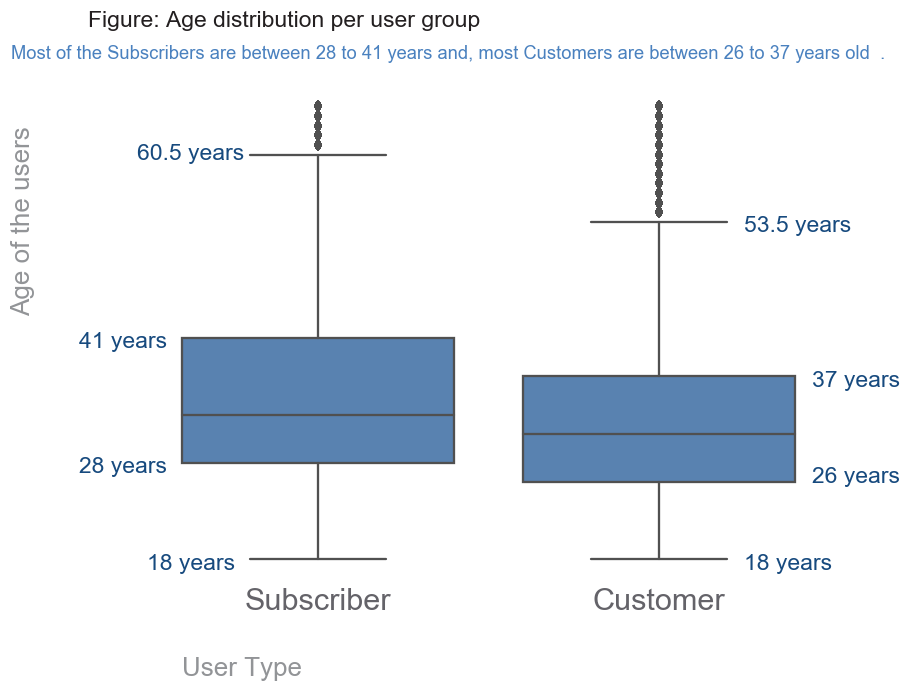

In [66]:
#plot
fig = plt.figure(figsize = [8, 6], dpi=110)
ax = fig.add_subplot(111)
sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.boxplot(data = df_under66, x = 'user_type', y = 'age', color = BLUE2)
plt.title('Figure: Age distribution per user group\n',fontsize=15, color = GRAY1, y=1.05, x=0.2)
plt.xlabel("",fontsize=10)
plt.ylabel("Age\n",fontsize=12,color = GRAY7)
plt.rc('xtick',labelsize=15,color = GRAY7)
#plt.yticks(np.arange(0, 66, 7),color = GRAY7, fontsize=12)
plt.ylabel("")
#ax.set_xticks([]) 
ax.set_yticks([])
sns.despine(bottom=True, left=True)
plt.text(-0.9, 70, 'Most of the Subscribers are between 28 to 41 years and,'
         ' most Customers are between 26 to 37 years old  .', fontsize=12, color=BLUE2)

#adding notes
plt.text(-0.5,17, "18 years", color = BLUE1, fontsize=15)
plt.text(-0.7,27, "28 years", color = BLUE1, fontsize=15)
plt.text(-0.7,40, "41 years", color = BLUE1, fontsize=15)
plt.text(-0.53,59.5, "60.5 years", color = BLUE1, fontsize=15)

plt.text(1.25,17, "18 years", color = BLUE1, fontsize=15)
plt.text(1.45,26, "26 years", color = BLUE1, fontsize=15)
plt.text(1.45,36, "37 years", color = BLUE1, fontsize=15)
plt.text(1.25,52, "53.5 years", color = BLUE1, fontsize=15)

plt.text(-0.4,6, "User Type", color = GRAY7, fontsize=17)
plt.text(-.9,61, "Age of the users", color = GRAY7, fontsize=17,rotation=90)
plt.show()

## Observation

**In this analysis we only focus on people who are 66 years or younger. The following can be observed from the box plots:**

**1.** 75% of the Subscribers are between 18-41 years old.

**2.** 75% of the Customers are between 18-37 years old.

**3.** Subscribers have a median age of 33 years and the Customers have a median age of 31 years.

**4.** The outliers can be seen by the dots. The value of outliers is different for the Subscribers and the Customers.



Text(-0.5,80,'Most of the Subscribers are between 29-42 years old as can be seen\nfrom the widest region marked by the dotted lines in the violinplot.')

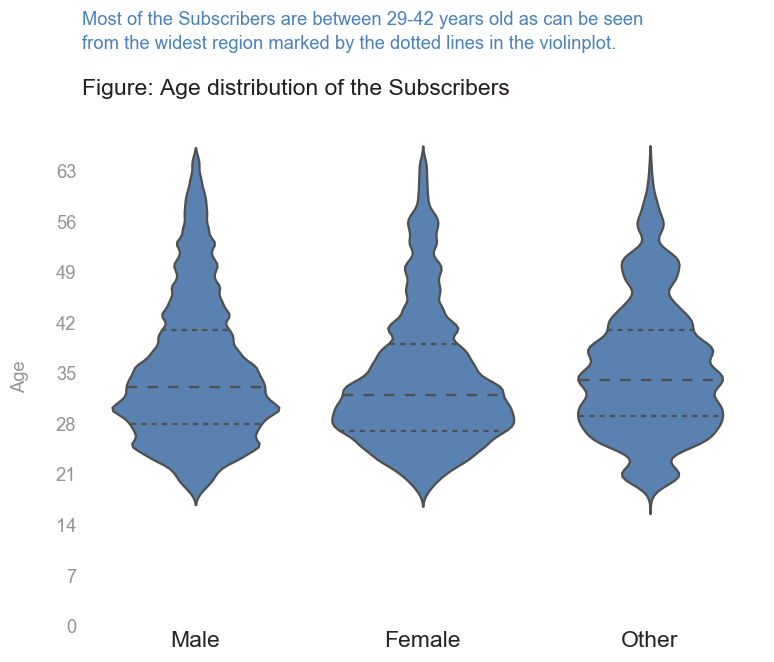

In [67]:
## plotting figure
plt.figure(figsize = [8, 6], dpi=110)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.violinplot(data = df_sub_under66, x = 'member_gender', y = 'age', color = BLUE2, inner='quartile')
plt.title('Figure: Age distribution of the Subscribers\n',fontsize=15,loc="left", color = GRAY1)
plt.xlabel("",fontsize=10)
plt.ylabel("Age\n",fontsize=12,color = GRAY7)
plt.rc('xtick',labelsize=15,color = GRAY7)
plt.yticks(np.arange(0, 66, 7),color = GRAY7, fontsize=12)
sns.despine(bottom=True, left=True)
plt.text(-0.5, 80, 'Most of the Subscribers are between 29-42 years old as can be seen\nfrom the widest region marked by the dotted lines in the violinplot.', fontsize=12, color=BLUE2, linespacing=1.4)

## Observation

**In this analysis we only focus on people who are 66 years or younger. The wider regions in the violin plots show the age group with higher frequency. There is no significant difference between the genders when it comes to the distribution of age of the Subscribers.**


Text(-0.5,80,'Most of the Subscribers are between 27-38 years old as can be seen\nfrom the widest region marked by the dotted lines in the violinplot.')

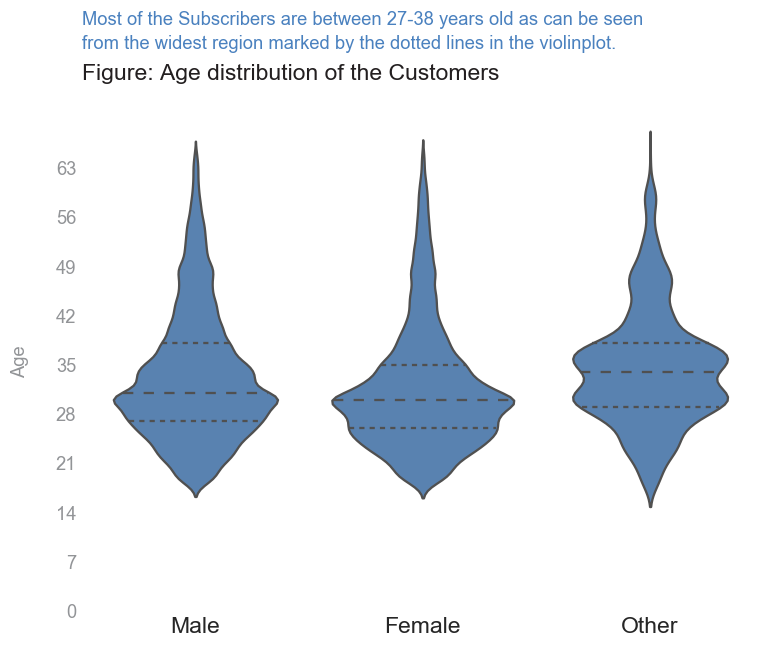

In [68]:
#plotting figure
plt.figure(figsize = [8, 6], dpi=110)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.violinplot(data = df_cus_under66, x = 'member_gender', y = 'age', color = BLUE2, inner='quartile')
plt.title('Figure: Age distribution of the Customers\n',fontsize=15,loc="left", color = GRAY1)
plt.xlabel("",fontsize=10)
plt.ylabel("Age\n",fontsize=12,color = GRAY7)
plt.rc('xtick',labelsize=15,color = GRAY7)
plt.yticks(np.arange(0, 66, 7),color = GRAY7, fontsize=12)
sns.despine(bottom=True, left=True)
plt.text(-0.5, 80, 'Most of the Subscribers are between 27-38 years old as can be seen\nfrom the widest region marked by the dotted lines in the violinplot.', fontsize=12, color=BLUE2, linespacing=1.4)

## Observation

**In this analysis we only focus on people who are 66 years or younger. The wider regions in the violin plots show the age group with higher frequency. There is no significant difference between the genders when it comes to the distribution of age of the Customers.**

In [69]:
# Creates bin edges for age
bin_edges = [18, 45, 55, 66]
# Creates bin names based on age
bin_names = ['18-45 yrs','45-55 yrs','>55 yrs']

In [70]:
# Creates decade_levels column based on age groups
df_under66['age_cat'] = pd.cut(df_under66['age'], bin_edges, labels = bin_names)
df_under66.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,user_type,member_gender,duration_min,day_type,age,distance,dur_cat,age_cat
0,Subscriber,Male,1254.733333,Weekday,32,2.488001,>30 min,18-45 yrs
2,Customer,Male,1192.933333,Weekday,22,2.972357,>30 min,18-45 yrs
4,Subscriber,Male,666.100000,Weekday,27,2.443038,>30 min,18-45 yrs
6,Subscriber,Male,7.550000,Weekday,30,1.340181,1-15 min,18-45 yrs
7,Subscriber,Male,3.000000,Weekday,38,0.631765,1-15 min,18-45 yrs


In [71]:
#percentage per age category
age_cat = df_under66.age_cat.value_counts()/df_under66.age_cat.value_counts().sum()*100
age_cat  = age_cat.rename_axis('age_cat').reset_index(name='percentage')
age_cat 

,age_cat,percentage
0,18-45 yrs,84.688255
1,45-55 yrs,11.065261
2,>55 yrs,4.246483


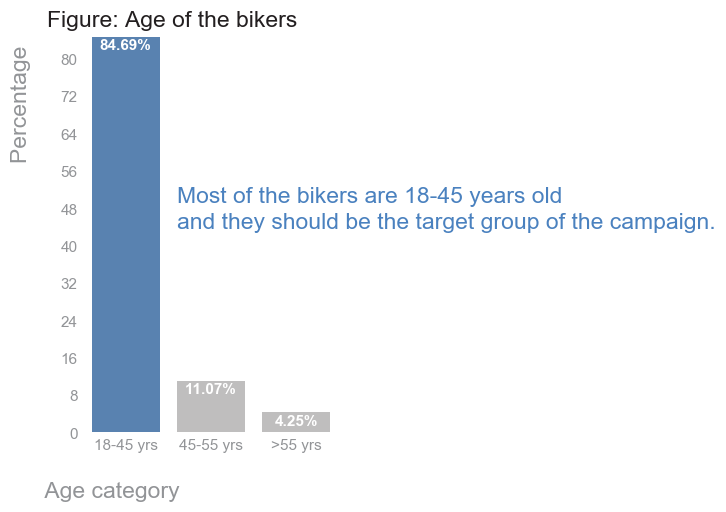

In [72]:
values = np.array(age_cat['percentage'])  
idx = np.array(list(age_cat['age_cat'])) 

#slecting data
color = sns.color_palette()
base_color = sns.color_palette()[0]
clrs = [GRAY9 if (x < 40) else BLUE2 for x in values ]

#plotting and data labeling

plt.figure(figsize = [3, 5], dpi=110)
ax = sns.barplot(x=idx, y=values, palette=clrs, )

y_data = pd.Series(age_cat['percentage'])
x_labels = age_cat['age_cat']
plt.yticks(np.arange(0, 88, 8), fontsize=10,color=GRAY7)
plt.xticks(fontsize=10,color=GRAY7)

plt.xlabel(" \n Age category",fontsize=15,color=GRAY7, x=0.1)
plt.ylabel("Percentage \n",fontsize=15,color=GRAY7, y=0.8)
plt.title('Figure: Age of the bikers\n',fontsize=15,loc="left", color=GRAY1, y=0.9, x=-0.14)

plt.text(0.6, 38,'Most of the bikers are 18-45 years old\nand they should be the target group of the campaign.\n', fontsize=15, color=BLUE2, linespacing=1.4)



# annotate values
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = -10 # Number of points between bar and label. 
    va = 'bottom' # Vertical alignment for positive values

    label = "{:.2f}%".format(y_value) # Use Y value as label and format number with tw0 decimal place

    # Create annotation
    plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', 
                 va=va,fontsize=10, color= 'white',fontweight='bold')
    sns.despine(bottom=True, left=True)
    
   

## Observation

**1.** Only a little more than 15% of the people are over 45 years old. 

**2.** Since, the majority of the bikers are between 18-45 years this should be the target group of our campaign.



In [73]:
#Daataframe with customers and subscribers under 66 
df_under66_cus = df_under66.query('user_type== "Customer"')
df_under66_sub = df_under66.query('user_type== "Subscriber"')

In [74]:
#show first three rows
df_under66_cus.head(3)

,user_type,member_gender,duration_min,day_type,age,distance,dur_cat,age_cat
2,Customer,Male,1192.933333,Weekday,22,2.972357,>30 min,18-45 yrs
28,Customer,Male,9.866667,Weekday,40,1.786456,1-15 min,18-45 yrs
34,Customer,Female,14.500000,Weekday,28,2.251228,1-15 min,18-45 yrs


In [75]:
#show first three rows
df_under66_sub.head(3)

,user_type,member_gender,duration_min,day_type,age,distance,dur_cat,age_cat
0,Subscriber,Male,1254.733333,Weekday,32,2.488001,>30 min,18-45 yrs
4,Subscriber,Male,666.100000,Weekday,27,2.443038,>30 min,18-45 yrs
6,Subscriber,Male,7.550000,Weekday,30,1.340181,1-15 min,18-45 yrs


In [76]:
#percentage of subscribers per age category
sub_age_cat =  df_under66_sub.age_cat.value_counts()/df_under66_sub.age_cat.value_counts().sum()*100
sub_age_cat = sub_age_cat.rename_axis('age_cat').reset_index(name='Subscriber')
sub_age_cat

,age_cat,Subscriber
0,18-45 yrs,84.162518
1,45-55 yrs,11.365972
2,>55 yrs,4.471510


In [77]:
#percentage of Customers per age category
cus_age_cat =  df_under66_cus.age_cat.value_counts()/df_under66_cus.age_cat.value_counts().sum()*100
cus_age_cat = cus_age_cat.rename_axis('age_cat').reset_index(name='Customer')
cus_age_cat

,age_cat,Customer
0,18-45 yrs,88.777992
1,45-55 yrs,8.726017
2,>55 yrs,2.495992


In [78]:
#merge two dataframes
user_age_cat = pd.merge(sub_age_cat, cus_age_cat)
user_age_cat

,age_cat,Subscriber,Customer
0,18-45 yrs,84.162518,88.777992
1,45-55 yrs,11.365972,8.726017
2,>55 yrs,4.471510,2.495992


In [79]:
#Declare new dataframe
C = user_age_cat['Subscriber']
D = user_age_cat['Customer']
df_new_3 = pd.DataFrame ({'Subscribers':C,
                        'Customers':D})
df_new_3

,Subscribers,Customers
0,84.162518,88.777992
1,11.365972,8.726017
2,4.471510,2.495992


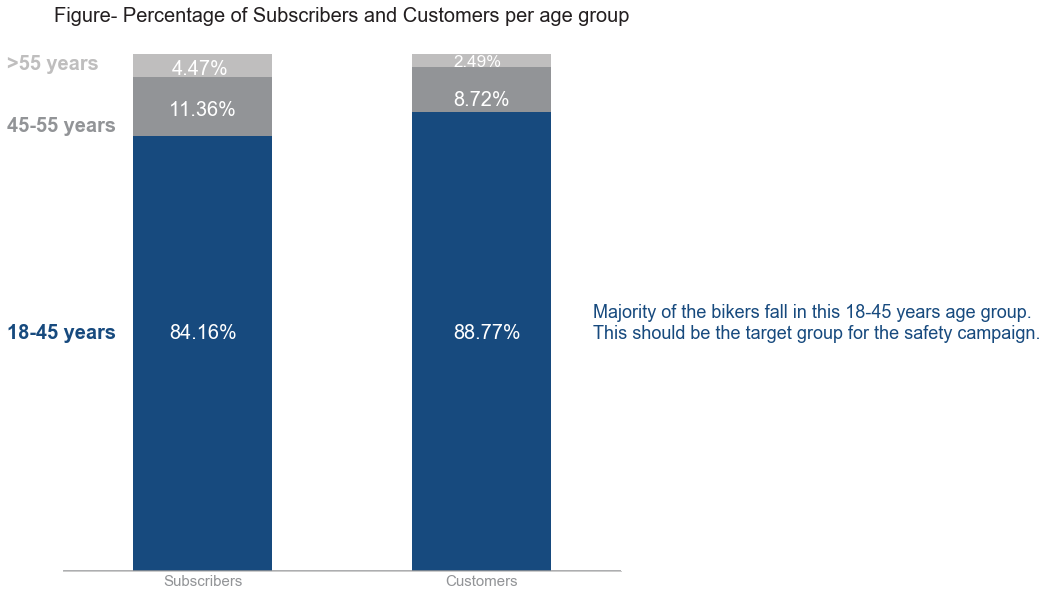

In [80]:
#plot data
ax= df_new_3.T.plot.bar(stacked=True, rot=0, color=[BLUE1, GRAY7,GRAY9],width=0.5, figsize = (10,10))


#remove left and bottom borders
sns.despine(bottom=False, left=True)

# Plot the figure.
rects = ax.patches
plt.legend("")
plt.xlabel("",fontsize=10)

plt.rc('xtick',labelsize=23,color = GRAY7)
plt.ylabel("")
ax.set_yticks([])
plt.title('Figure- Percentage of Subscribers and Customers per age group', x=0.5, fontsize=20, color=GRAY1)

#add text comments
plt.text(-0.7,45, "18-45 years", color = BLUE1, fontsize=20,fontweight='bold')
plt.text(-0.7,85, "45-55 years", color = GRAY7, fontsize=20,fontweight='bold')
plt.text(-0.7,97, ">55 years", color = GRAY9, fontsize=20,fontweight='bold')

plt.text(-0.12,45, "84.16%", color = 'white', fontsize=20 )
plt.text(-0.12,88, "11.36%", color = 'white', fontsize=20)
plt.text(-0.11,96, "4.47%", color = 'white', fontsize=20)

plt.text(0.9,45, "88.77%", color = 'white', fontsize=20)
plt.text(0.9,90, "8.72%", color = 'white', fontsize=20)
plt.text(0.9,97.5, "2.49%", color = 'white', fontsize=17)
plt.text(1.4,45, "Majority of the bikers fall in this 18-45 years age group.\n"
         "This should be the target group for the safety campaign.", color = BLUE1, fontsize=18)


#ax.axvline(0.31, ymin=0.01, ymax=0.80, color=BLUE1, linewidth=3)
#ax.axvline(1.3, ymin=0.01, ymax=0.85, color=BLUE1, linewidth=3)
plt.axhline(y=0, xmin=0, xmax=1, linewidth=2.5, color=GRAY7)
plt.show()

## Observation

**In this analysis we only focus on people who are 66 years or younger. The following can be observed from the stacked bar plots:**

**1.** An almost equal number of Subscribers and Customers are 18-45 years old and this is the dominant age group.

**2.** There is no significant difference between the Customers and the Subscribers when it comes to the age distribution. 

### 7. What is the Gender distribution of the bikers ?

**Visual**: To explore the gender distribution, we will use stacked barplot as gender is a cateorical data.

In [81]:
#subscribers gender percentage
df_subscriber_gender = df_subscriber['member_gender'].value_counts()/df_subscriber['member_gender'].value_counts().sum()*100
df_subscriber_gender = df_subscriber_gender.rename_axis('gender').reset_index(name='subscriber_gender')
df_subscriber_gender 

,gender,subscriber_gender
0,Male,76.368668
1,Female,22.296923
2,Other,1.334409


In [82]:
#Customers gender percentage
df_customer_gender =df_customer['member_gender'].value_counts()/df_customer['member_gender'].value_counts().sum()*100
df_customer_gender = df_customer_gender.rename_axis('gender').reset_index(name='customer_gender')
df_customer_gender

,gender,customer_gender
0,Male,65.575788
1,Female,32.366183
2,Other,2.058029


In [83]:
#merge dataframe 
df_gender = pd.merge(df_subscriber_gender, df_customer_gender)
df_gender

,gender,subscriber_gender,customer_gender
0,Male,76.368668,65.575788
1,Female,22.296923,32.366183
2,Other,1.334409,2.058029


In [84]:
#new dataframe
E = df_gender['subscriber_gender']
F = df_gender['customer_gender']
df_new_4 = pd.DataFrame ({'Subscriber Gender':E,
                        'Customer Gender':F})
df_new_4

,Subscriber Gender,Customer Gender
0,76.368668,65.575788
1,22.296923,32.366183
2,1.334409,2.058029


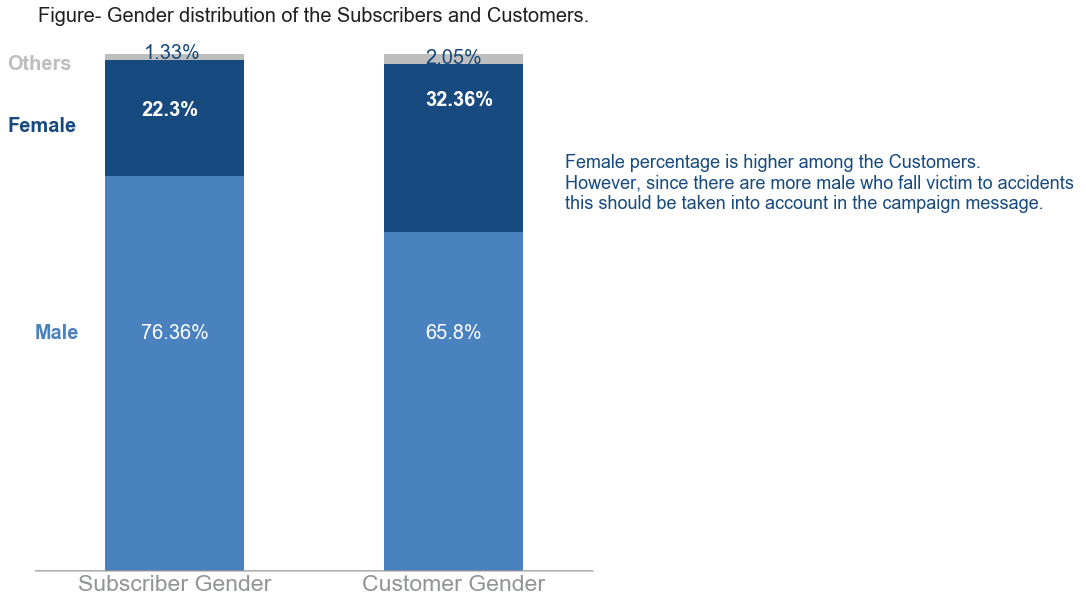

In [85]:
ax= df_new_4.T.plot.bar(stacked=True, rot=0, color=[BLUE2,BLUE1,GRAY9],width=0.5, figsize = (10,10))
# tune the subplot layout by setting sides of the figure


sns.despine(bottom=False, left=True)

# Plot the figure and annotate value
rects = ax.patches
plt.legend("")
plt.xlabel("",fontsize=10)

plt.rc('xtick',labelsize=23,color = GRAY7)
plt.ylabel("")
ax.set_yticks([])
plt.title('Figure- Gender distribution of the Subscribers and Customers.', x=0.5, fontsize=20, color=GRAY1)
plt.text(1.4,70,'Female percentage is higher among the Customers.\nHowever, since there are more male who fall'
          ' victim to accidents \nthis should be taken into account in the campaign message.', color = BLUE1, fontsize=18)

plt.text(-0.5,45, "Male", color = BLUE2, fontsize=20,fontweight='bold')
plt.text(-0.6,85, "Female", color = BLUE1, fontsize=20,fontweight='bold')
plt.text(-0.6,97, "Others", color = GRAY9, fontsize=20,fontweight='bold')

plt.text(-0.12,45, "76.36%", color = 'white', fontsize=20 )
plt.text(-0.12,88, "22.3%", color = 'white', fontsize=20,fontweight='bold')
plt.text(-0.11,99, "1.33%", color = BLUE1, fontsize=20)

plt.text(0.9,45, "65.8%", color = 'white', fontsize=20)
plt.text(0.9,90, "32.36%", color = 'white', fontsize=20,fontweight='bold')
plt.text(0.9,98, "2.05%", color = BLUE1, fontsize=20)


#ax.axvline(0.31, ymin=0.01, ymax=0.80, color=BLUE1, linewidth=3)
#ax.axvline(1.3, ymin=0.01, ymax=0.85, color=BLUE1, linewidth=3)
plt.axhline(y=0, xmin=0, xmax=1, linewidth=2.5, color=GRAY7)
plt.show()


## Observation


**1.** Male is the dominant gender category both among the Subscribers and the Customers

**2.** Female are higher among the Customers.

**3.** Since, there are more Male Subscribers, hence the Male is larger in number as Subscribers are much higher than the Customers. 

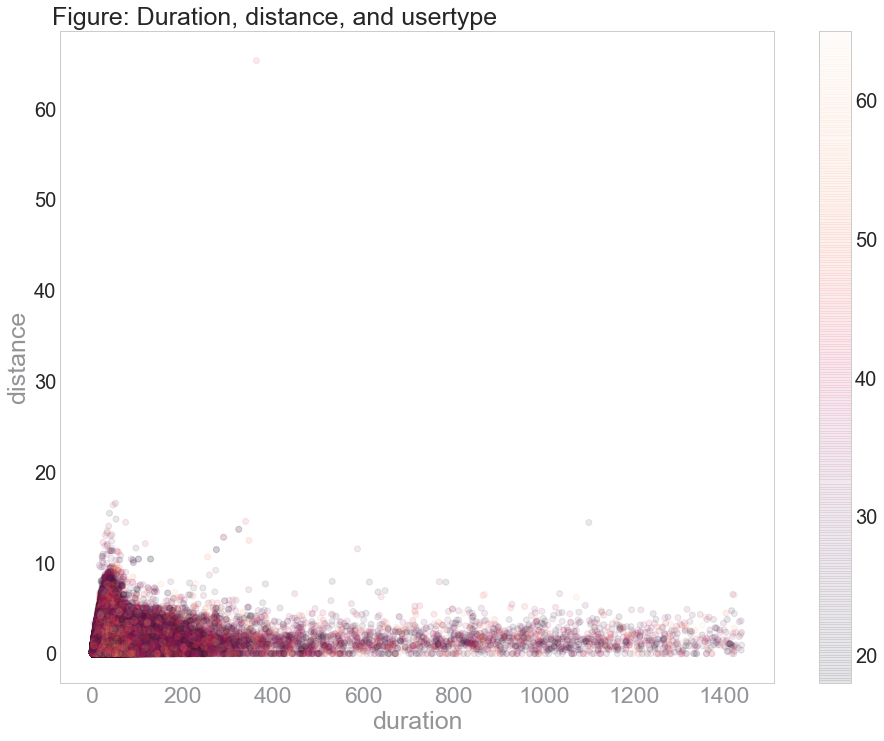

In [86]:
plt.figure(figsize = [16, 12])
plt.scatter(data = df_under66, x = 'duration_min', y = 'distance', c = 'age', alpha = 1/10)
plt.colorbar()
plt.title("Figure: Duration, distance, and usertype",fontsize=25,x=0.3 )
plt.xlabel('duration',fontsize=25,color=GRAY7)
plt.ylabel('distance',fontsize=25,color=GRAY7)
plt.rc('xtick',labelsize=17,color=GRAY7)
plt.rc('ytick',labelsize=17, color=GRAY7)

## Observation

There is a larger concentration of bikers with lower biking duration and distance. As the duration increases the number of biker decreases which is indicated by the lower concentration of dots and pale color.

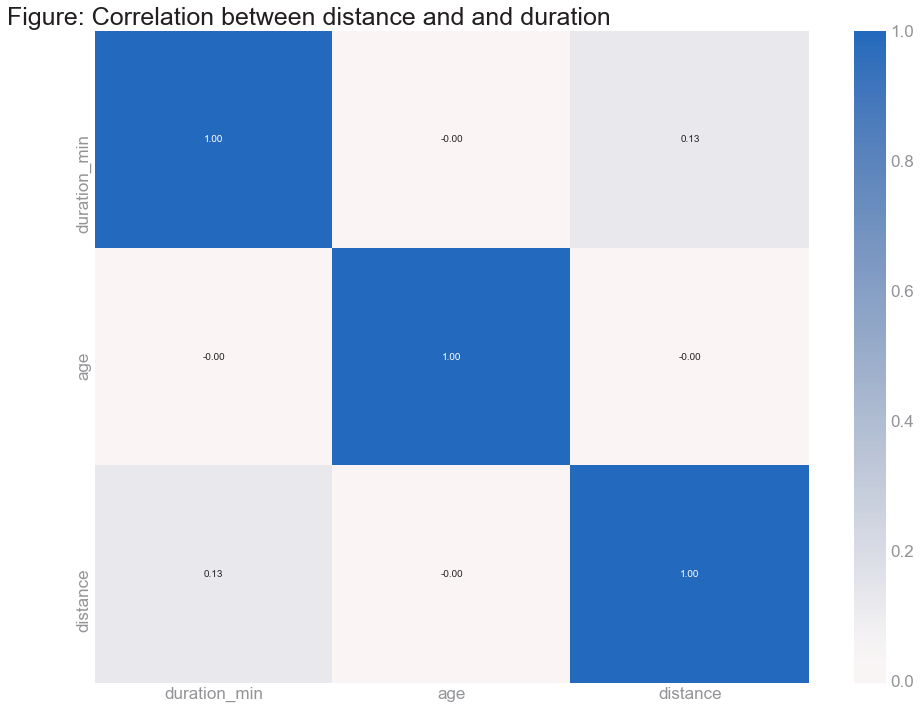

In [87]:
## Correlatin Matrix between various variables 
plt.figure(figsize = [16, 12])
sns.heatmap(df_under66.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.title("Figure: Correlation between distance and and duration",fontsize=25,x=0.3, color=GRAY1 )
plt.show()

## Observation

**No significant correlation is observed between age, distance, and duration.**

## Ref: 
    
[6]. https://stackoverflow.com/questions/31074758/how-to-set-a-different-color-to-the-largest-bar-in-a-seaborn-barplot
[7].https://stackoverflow.com/questions/18897261/pandas-plot-dataframe-barplot-with-colors-by-category